In [3]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
current_dir = current_dir = os.getcwd()

project_root = os.path.abspath(os.path.join(current_dir, ".."))
# print(project_root)

In [5]:
df = pd.read_csv(os.path.join(project_root, os.path.join("data","raw","Resume","Resume.csv")))
df.head()

ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargins hmargin...       HR  
2  <div class="fontsize fontface vmargins hmargin...       HR  
3  <div class="fontsize fontface vmargins hmargin...       HR  
4  <div class="fontsize fontface vmargins hmargin...       HR

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [7]:
df.isnull().sum()

ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64

In [15]:
for col in df.columns:
    empty_rows = df[df[col] == '']
    print(empty_rows)


Empty DataFrame
Columns: [ID, Resume_str, Resume_html, Category]
Index: []
Empty DataFrame
Columns: [ID, Resume_str, Resume_html, Category]
Index: []
Empty DataFrame
Columns: [ID, Resume_str, Resume_html, Category]
Index: []
Empty DataFrame
Columns: [ID, Resume_str, Resume_html, Category]
Index: []


In [8]:
df.head()

ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargins hmargin...       HR  
2  <div class="fontsize fontface vmargins hmargin...       HR  
3  <div class="fontsize fontface vmargins hmargin...       HR  
4  <div class="fontsize fontface vmargins hmargin...       HR

In [9]:
# adding random suffle of the data
df= df.sample(frac=1, random_state=42).reset_index(drop=True)

In [10]:
df.head()

ID                                         Resume_str  \
0  99244405             Kpandipou    Koffi         Summary ...   
1  17562754           DIRECTOR OF DIGITAL TRANSFORMATION   ...   
2  30311725           SENIOR PROJECT MANAGER       Professi...   
3  19007667           CHEF       Summary     Experienced ca...   
4  11065180           OPERATIONS MANAGER       Summary    E...   

                                         Resume_html       Category  
0  <div class="RNA skn-rbn1 fontsize fontface vma...        TEACHER  
1  <div class="fontsize fontface vmargins hmargin...  DIGITAL-MEDIA  
2  <div class="fontsize fontface vmargins hmargin...   CONSTRUCTION  
3  <div class="fontsize fontface vmargins hmargin...           CHEF  
4  <div class="fontsize fontface vmargins hmargin...        BANKING

# Data Explore

In [11]:
df['Category'].unique()

array(['TEACHER', 'DIGITAL-MEDIA', 'CONSTRUCTION', 'CHEF', 'BANKING',
       'BUSINESS-DEVELOPMENT', 'DESIGNER', 'HEALTHCARE', 'SALES', 'ARTS',
       'AUTOMOBILE', 'ADVOCATE', 'HR', 'CONSULTANT', 'ACCOUNTANT',
       'PUBLIC-RELATIONS', 'AVIATION', 'FITNESS',
       'INFORMATION-TECHNOLOGY', 'ENGINEERING', 'AGRICULTURE', 'APPAREL',
       'FINANCE', 'BPO'], dtype=object)

In [12]:
categories = np.sort(df['Category'].unique())
categories

array(['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS',
       'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT',
       'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DESIGNER', 'DIGITAL-MEDIA',
       'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR',
       'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER'],
      dtype=object)

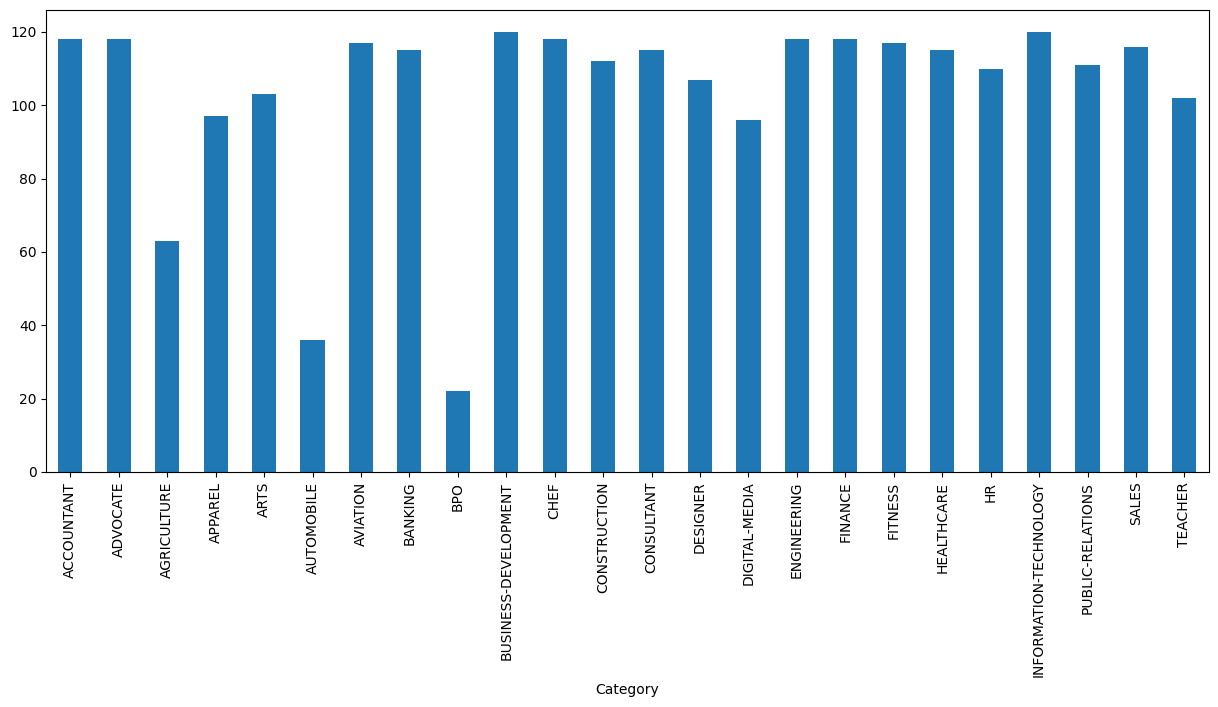

In [21]:
df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(15, 6))
plt.show()

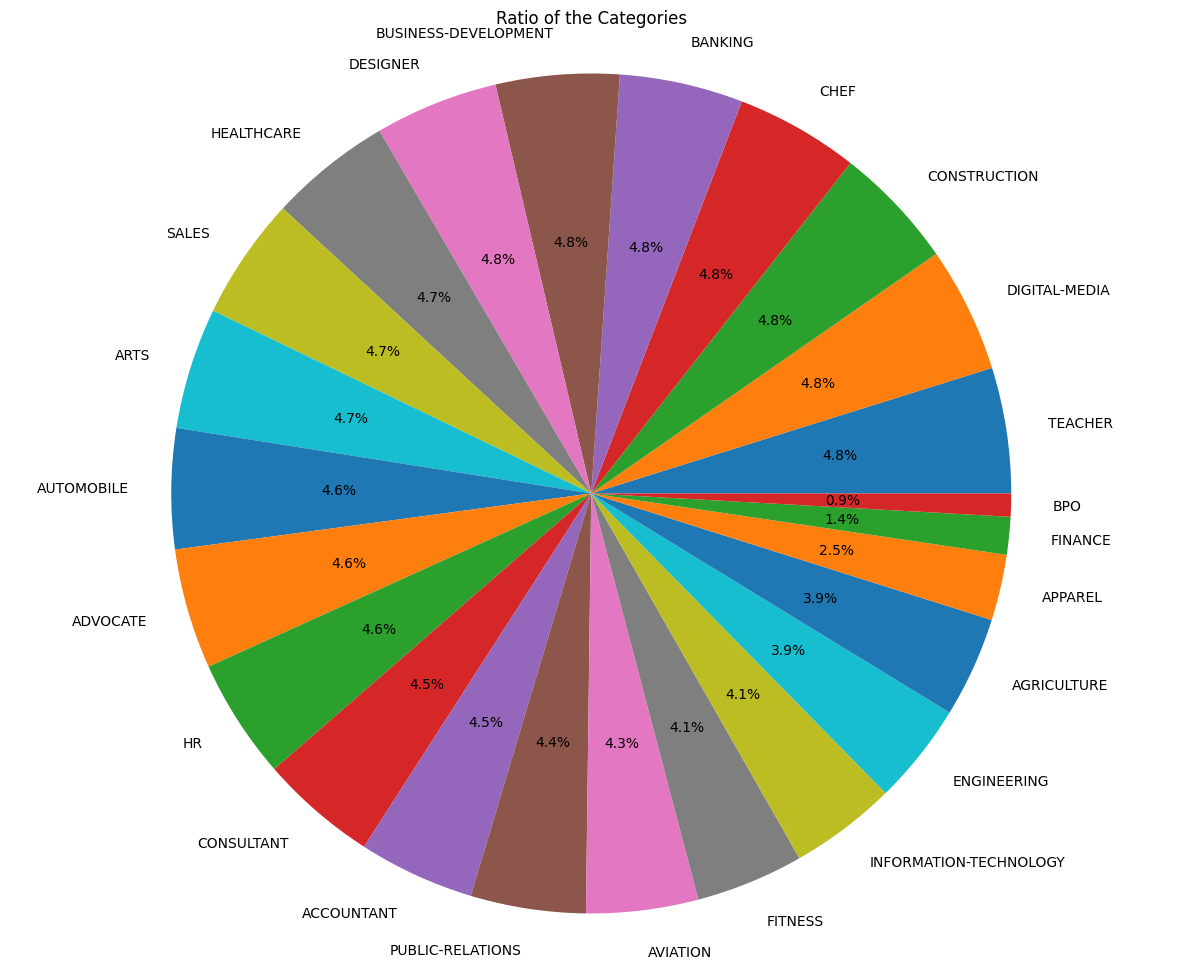

In [13]:
counts=df['Category'].value_counts()
labels=df['Category'].unique()

plt.figure(figsize=(15,12))
plt.pie(counts, labels= labels, autopct='%1.1f%%')
plt.title('Ratio of the Categories')
plt.axis('equal')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

data, test_data = train_test_split(df, test_size=0.15, stratify=df['Category'], random_state=42)

# Save the test data to CSV files
test_data.to_csv(os.path.join(project_root, os.path.join('data','processed','test_data.csv')), index=False)

In [15]:
data.shape

(2111, 4)

In [16]:
test_data.shape

(373, 4)

In [17]:
del df

## Word inspection for the 'Resume_str' columne

Text(0.5, 1.0, 'Word Cloud of Resumes Str')

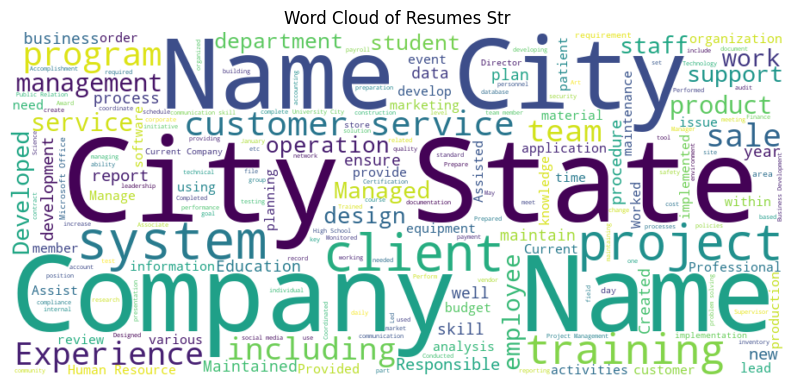

In [18]:
from wordcloud import WordCloud

resume_strs = ' '.join(data['Resume_str'].tolist())

wordcloud = WordCloud(width=900, height=400, background_color='white').generate(resume_strs)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Resumes Str')

Seems like we have many wanted word (city state, Company name ....) in this column, so we have cline this to make it work.

In [19]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

def preprocess_resume(text):
    # HTML tags
    text = re.sub(r'<.*?>', ' ', text)

    # non-alphanumeric characters, punctuation, digits, and extra whitespace
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub(r'[^\w\s]|_', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r'http\S+\s', "", text)
    text = re.sub(r'https?://\S+|www\.\S+', "", text)
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', "", text)

    text = text.lower()
    words = word_tokenize(text)

    # stopwords
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    return ' '.join(words)

In [20]:
nltk.download('punkt_tab')
nltk.download('stopwords')

data['Resume'] = data['Resume_str'].apply(lambda w: preprocess_resume(w))
data = data.drop(['Resume_str', 'Resume_html'], axis=1)
data.sample(10)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Sadhin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sadhin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


ID                Category  \
1516  39718499  INFORMATION-TECHNOLOGY   
1156  67406885              CONSULTANT   
1508  27024099                    ARTS   
1988  58915642           DIGITAL-MEDIA   
2093  79376680                   SALES   
2447  24977396        PUBLIC-RELATIONS   
2174  69336473             AGRICULTURE   
1231  21830565                      HR   
1533  34349255                DESIGNER   
347   80503242                ADVOCATE   

                                                 Resume  
1516  assist footbal coach summari enthusiast reliab...  
1156  engin consult profession summari deliv valu pr...  
1508  qualiti analyst senior record keep specialist ...  
1988  digit e research intern skill microsoft offic ...  
2093  sale summari think timelin career numer bullet...  
2447  administr clerk public relat manag summari rec...  
2174  pulaski counti extens agent profession summari...  
1231  hr consult summari certifi human resourc profe...  
1533  interior design summari result orient design o...  
347   manag digit market commun object obtain health...

In [33]:
print(data['Resume'][0])

kpandip koffi summari compassion teach profession deliv exemplari support assist teacher student display except commun problem solv skill experi offic administr public speak attent adapt skill manag classroom oper effect leverag student feedback creat dynam lesson plan address individu strength weak dedic respons team leader proven skill classroom manag behavior modif individu support person experi use relationship build cultiv posit client staff manag connect highli develop commun outstand skill complex problem solv conflict resolut high perform administr assist offer experi work divers client base deliv except result polish manag client relat manag vendor relationship result driven assist track record excel fast pace offic environ career mind talent prepar report take messag sort rout mail comfort work fast pace demand offic environ energet reput individu possess strong work ethic profession demeanor superb initi except custom servic decis make skill servic orient individu expertis p

In [30]:
empty_rows = data[data['Resume'] == '']
print(empty_rows)

            ID  Category Resume
2138  12632728         9       


In [31]:
data = data.drop(empty_rows.index)

In [78]:
data

ID                Category  \
1721  22561438                    CHEF   
1430  27490876                      HR   
515   57601040              CONSULTANT   
2242  11137306                AVIATION   
495   20882041             ENGINEERING   
...        ...                     ...   
1779  20806155                      HR   
287   29075857  INFORMATION-TECHNOLOGY   
980   16300459                 BANKING   
1104  17033567                    ARTS   
1376  10176013            CONSTRUCTION   

                                                 Resume  
1721  chef de cuisin execut profil culinari backgrou...  
1430  hr coordin summari applic screen background ch...  
515   princip consult summari suppli chain logist ma...  
2242  simul technician summari experienc electron te...  
495   engin manag summari mechan engin year progress...  
...                                                 ...  
1779  hr specialist inform system experi compani nam...  
287   adjunct instructor skill highlight qualiti eng...  
980   financi editor assist summari strong motiv gra...  
1104  video director east coast video enterpris bran...  
1376  construct estim summari energet construct mana...  

[2110 rows x 3 columns]

In [36]:
df_categories = [data[data['Category'] == category].loc[:, ['Resume', 'Category']] for category in categories]

In [37]:
def wordcloud(df):
    txt = ' '.join(txt for txt in df['Resume'])
    cloud = WordCloud(
        height=2000,
        width=4000
    ).generate(txt)

    return cloud

In [38]:
plt.figure(figsize=(32, 20))

for i, category in enumerate(categories):
    wc = wordcloud(df_categories[i])

    plt.subplot(6, 4, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

KeyboardInterrupt: 

In [ ]:
def extra_word_removeal(text):
    # extra words like location, time, common resume words, edu words

    extra_word_1 = [
        'compani', 'name', 'citi', 'state', 'work', 'manag',
        'resume', 'summary', 'profile', 'skills', 'responsibilities',
        'duties', 'tasks', 'job', 'position', 'role', 'employee',
        'staff', 'team', 'leader', 'date', 'year', 'month',
        'day', 'time', 'project', 'experience', 'information',
        'department', 'address', 'location', 'street', 'avenue',
        'place', 'region', 'currently', 'previously', 'education',
        'degree', 'university', 'college'
    ]
    extra_word_2 = [
        'compani', 'name', 'citi', 'state', 'work', 'manag', 'respons', 'role',
        'perform', 'provid', 'skill', 'team', 'result', 'develop', 'process', 'task',
        'ensur', 'support', 'assist', 'help', 'year', 'month', 'experi', 'project',
        'involv', 'includ', 'custom', 'client', 'meet', 'direct', 'implement',
        'execut', 'report', 'maintain', 'oper', 'various', 'handl', 'achiev',
        'train', 'lead', 'coordin', 'staff', 'level', 'career', 'proficient'
    ]
    words = text.split()  # Split the text into words

    stemmer = PorterStemmer()
    extra_word = [stemmer.stem(word) for word in extra_word_1]

    # Filter out the extra words
    fillers = [word for word in words if word not in extra_word]

    _text = ' '.join(fillers)

    return _text

In [ ]:
data['Resume']=data['Resume'].apply(lambda x : extra_word_removeal(x))

In [ ]:
df_categories = [data[data['Category'] == category].loc[:, ['Resume', 'Category']] for category in categories]

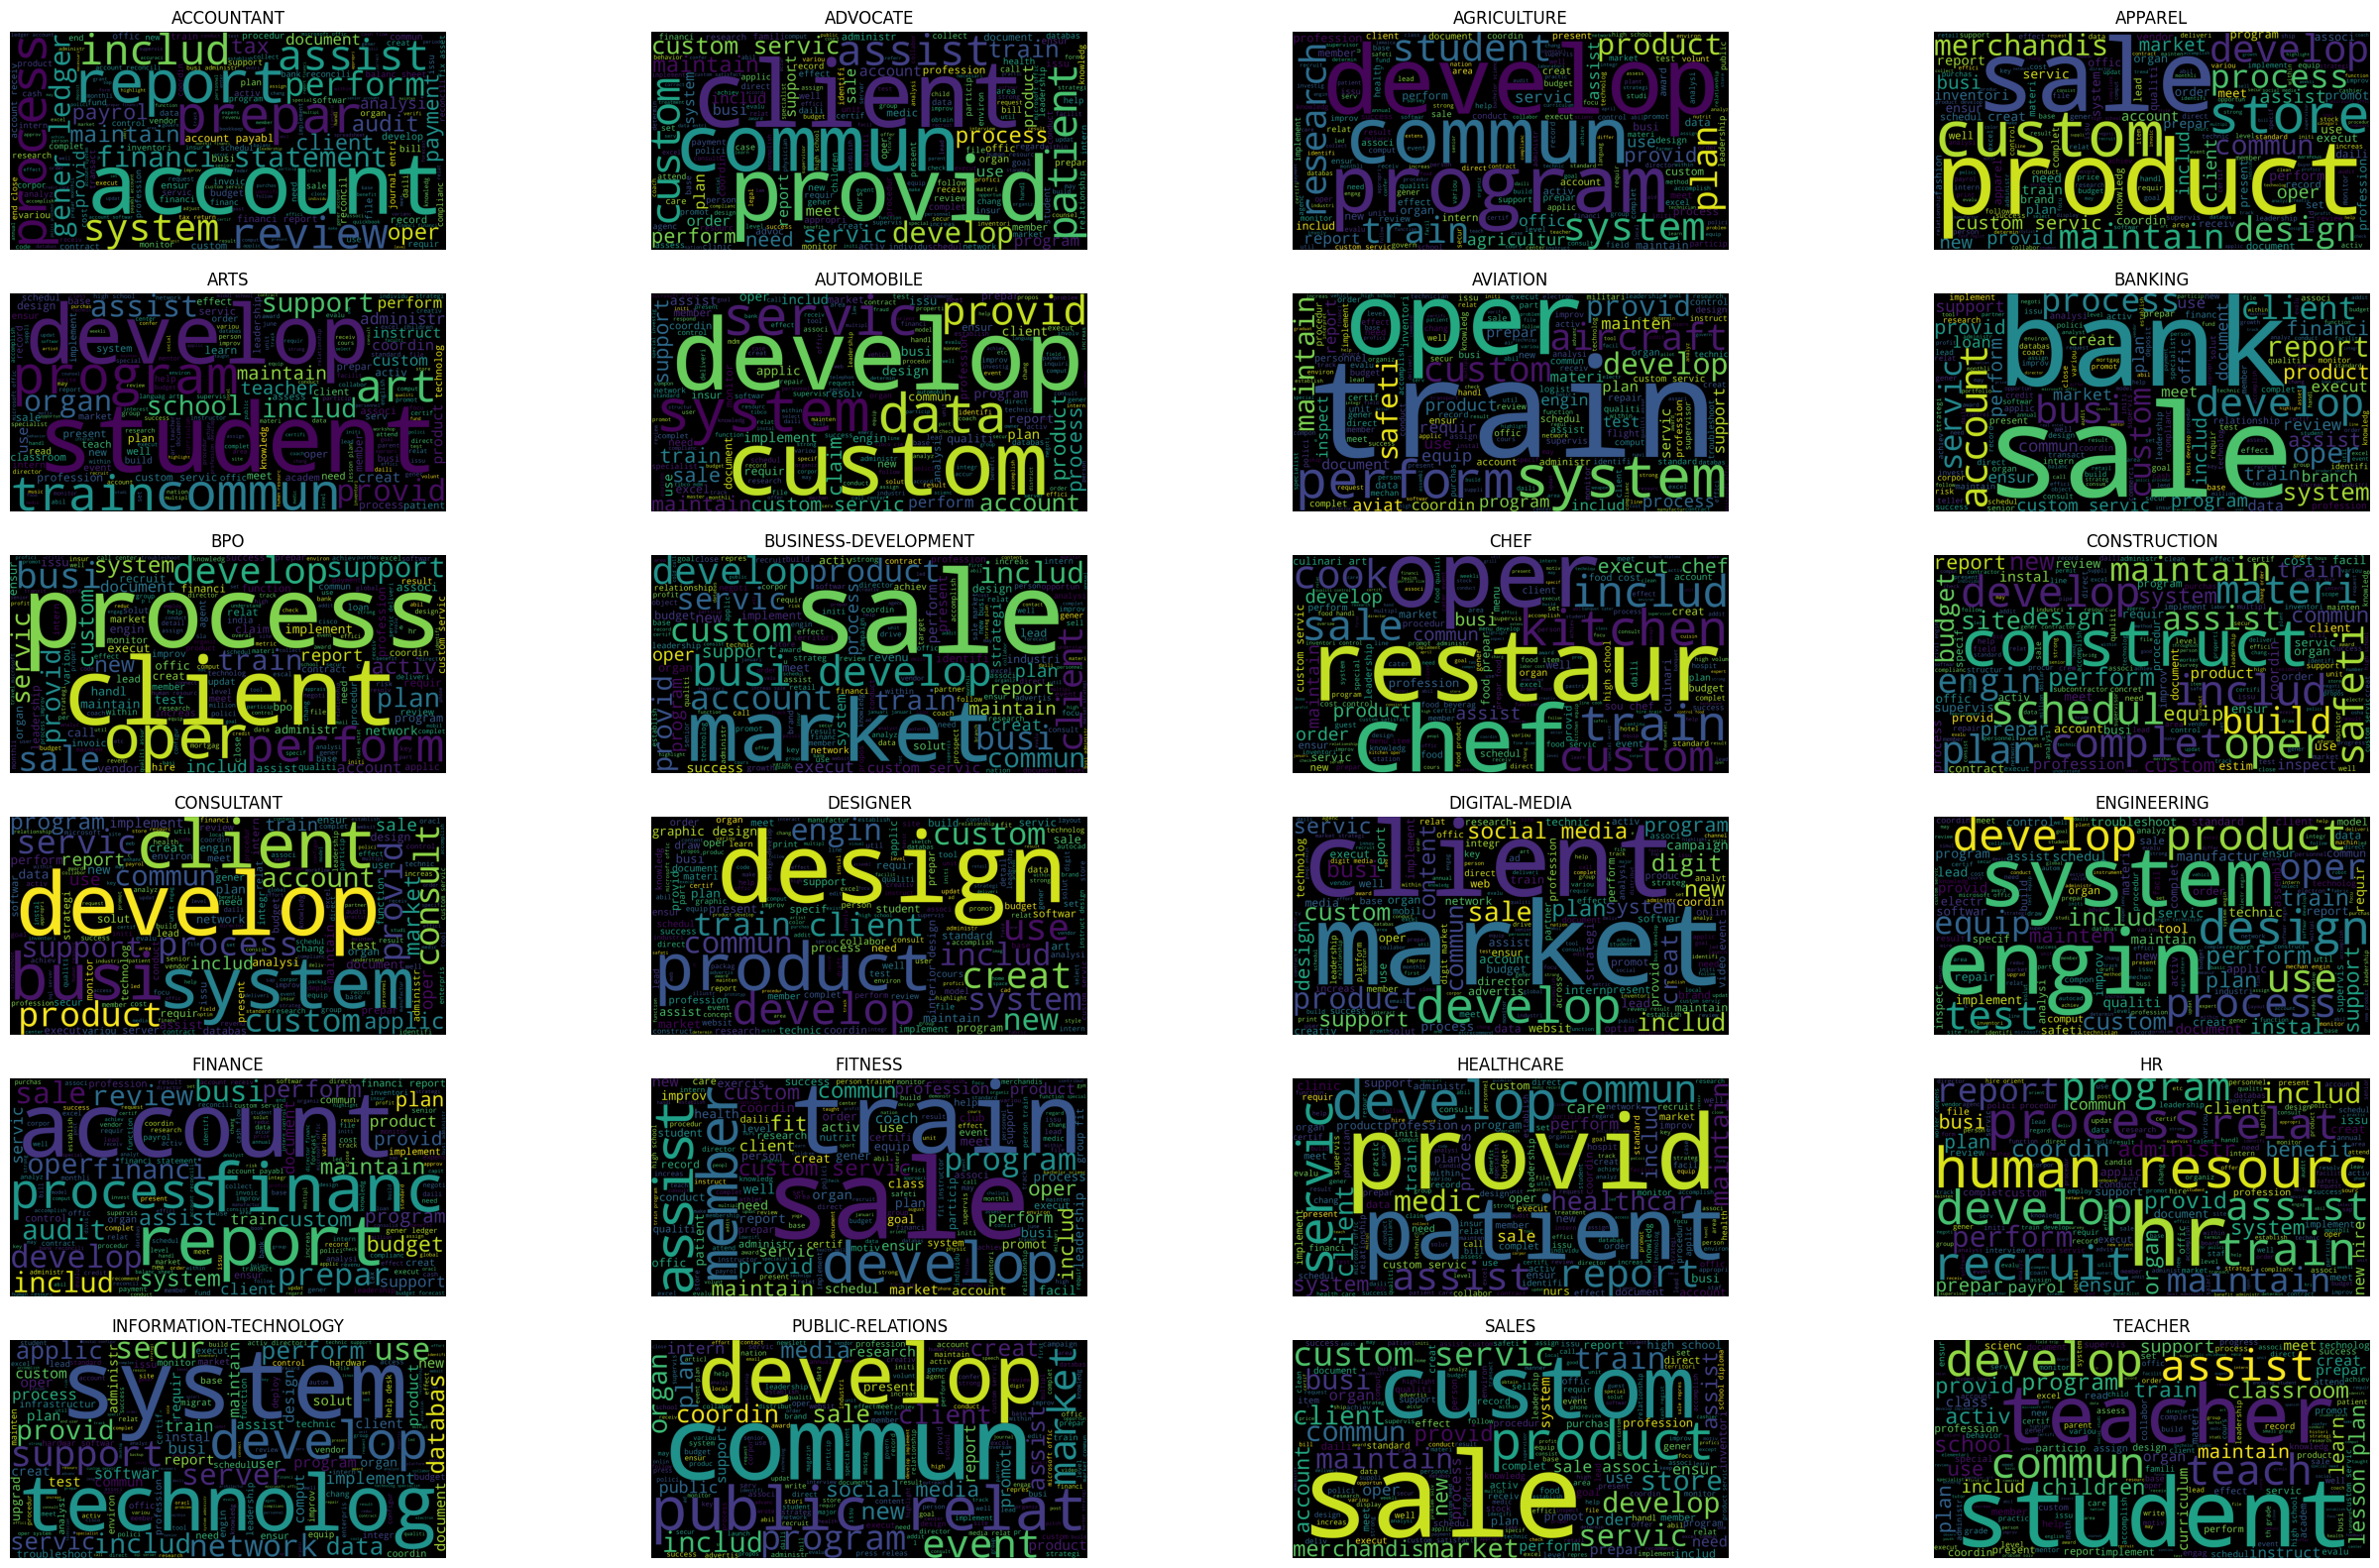

In [ ]:
plt.figure(figsize=(32, 20))

for i, category in enumerate(categories):
    wc = wordcloud(df_categories[i])

    plt.subplot(6, 4, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

In [ ]:
# As per the word cloud now we are getting most relative words for the correspondence job category

# Preprocess (Encoding & Vectorization)

Now we will incode and convert in numbers of our data to feed in the algorithm

In [21]:
# encode the category lables

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [22]:
data['Category'] = enc.fit_transform(data['Category'])

In [23]:
data.sample(5)

ID  Category                                             Resume
2305  91072502        10  premium club chef execut profil creativ desir ...
148   26829561         3  inventori analyst materi planner summari indus...
752   19405513        16  financ specialist summari highli motiv result ...
890   15261348        10  chef restaur manag summari chef year highli re...
1416  12666174        11  region schedul manag summari mr ginder work he...

In [24]:
data['Category'].unique()

array([10, 19, 12,  6, 15,  7,  9,  1, 16, 14, 11, 18, 13,  2,  4, 17, 23,
       21,  3, 20,  0, 22,  8,  5])

In [27]:
import pickle
with open(os.path.join(project_root, os.path.join('models','label_encoder.pkl')), 'wb') as f:
    pickle.dump(enc, f)

## Data split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data['Resume'], data['Category'], test_size=0.20, random_state=42, stratify=data['Category'])

In [33]:
print("Train data size:", X_train.shape)
print("Validation data size:", X_val.shape)

Train data size: (1688,)
Validation data size: (422,)


In [106]:
X_train[0]

'kpandip koffi summari compassion teach profession deliv exemplari support assist teacher student display except commun problem solv skill experi offic administr public speak attent adapt skill manag classroom oper effect leverag student feedback creat dynam lesson plan address individu strength weak dedic respons team leader proven skill classroom manag behavior modif individu support person experi use relationship build cultiv posit client staff manag connect highli develop commun outstand skill complex problem solv conflict resolut high perform administr assist offer experi work divers client base deliv except result polish manag client relat manag vendor relationship result driven assist track record excel fast pace offic environ career mind talent prepar report take messag sort rout mail comfort work fast pace demand offic environ energet reput individu possess strong work ethic profession demeanor superb initi except custom servic decis make skill servic orient individu expertis 

To representing our resume data now we need a neumarical convertion of our data. For this we'll use TF-IDF, this algorithm calculate the importance of words in the document.


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features=800)

In [35]:
train_vectors = tfidf.fit_transform(X_train)
valid_vectors =tfidf.transform(X_val)

In [98]:
tfidf.vocabulary_

{'receiv': 603,
 'reliabl': 622,
 'demonstr': 206,
 'high': 343,
 'level': 422,
 'initi': 371,
 'ethic': 264,
 'exceed': 268,
 'expect': 275,
 'offer': 502,
 'build': 91,
 'product': 573,
 'relationship': 620,
 'success': 720,
 'fast': 286,
 'pace': 521,
 'deadlin': 198,
 'driven': 234,
 'environ': 258,
 'goal': 320,
 'develop': 214,
 'histori': 347,
 'orient': 513,
 'custom': 193,
 'servic': 670,
 'spanish': 690,
 'equip': 260,
 'oper': 506,
 'organ': 511,
 'process': 570,
 'vendor': 775,
 'return': 638,
 'maintain': 441,
 'safeti': 647,
 'sale': 648,
 'floor': 301,
 'understand': 762,
 'logist': 436,
 'mentor': 461,
 'train': 752,
 'plan': 543,
 'store': 709,
 'outstand': 516,
 'commun': 138,
 'retail': 636,
 'inventori': 390,
 'schedul': 654,
 'standard': 701,
 'problem': 568,
 'resolut': 630,
 'aid': 31,
 'cpr': 183,
 'collabor': 132,
 'storag': 708,
 'area': 52,
 'maxim': 454,
 'effici': 239,
 'labor': 407,
 'open': 505,
 'check': 116,
 'deliveri': 204,
 'verifi': 777,
 'content':

In [99]:
train_vectors.shape

(1688, 800)

In [100]:
tfidf.get_feature_names_out()

array(['abil', 'abl', 'academ', 'accept', 'access', 'accomplish',
       'accord', 'account', 'accur', 'accuraci', 'achiev', 'acquisit',
       'act', 'action', 'activ', 'ad', 'adapt', 'addit', 'adher',
       'adjust', 'administ', 'administr', 'adob', 'advanc', 'advertis',
       'advis', 'advoc', 'affili', 'agenc', 'agent', 'agreement', 'aid',
       'air', 'aircraft', 'align', 'allow', 'america', 'american',
       'analysi', 'analyst', 'analyt', 'analyz', 'annual', 'answer',
       'appli', 'applic', 'appoint', 'approach', 'appropri', 'approv',
       'april', 'architectur', 'area', 'armi', 'arrang', 'art', 'aspect',
       'assembl', 'assess', 'asset', 'assign', 'assist', 'associ',
       'assur', 'attend', 'attent', 'audit', 'august', 'author', 'autom',
       'avail', 'averag', 'aviat', 'awar', 'award', 'bachelor',
       'background', 'backup', 'balanc', 'bank', 'base', 'basi', 'basic',
       'behavior', 'benefit', 'best', 'board', 'book', 'branch', 'brand',
       'budget', '

## Training and Evaluating Multiple Machine Learning Models

In order to build a robust NLP-based resume classification system, it's beneficial to train and compare the performance of multiple machine learning models. This approach allows us to select the best model based on performance metrics such as accuracy.

### Models Considered:

1. **K-Nearest Neighbors (KNN) Classifier**: A KNN is a instance-based learning algorithm.

2. **Random Forest Classifier**: An ensemble learning method that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes of the individual trees.

3. **Support Vector Machine (SVM)**: A powerful classifier that works by finding the best hyperplane that separates all the classes.

4. **Multinomial Naive Bayes**: A probabilistic learning method that is particularly suited for text classification tasks.

### Evaluation Metric:

- All models are evaluated using the accuracy score, which is the proportion of correct predictions over all predictions made.

By comparing the accuracy scores, we can determine which model is the most effective at classifying resumes.

In [36]:
accuracy_list=[]
precision_list=[]
recall_list=[]
f1_score_list=[]
model_list=[]

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Define a dictionary of models
models = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(),
    'MultinomialNB': MultinomialNB()
}

accuracy_scores = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(train_vectors, y_train)

    y_pred = model.predict(valid_vectors)

    accuracy = accuracy_score(y_val, y_pred)
    accuracy_scores[model_name] = accuracy
    print(f'{model_name} on test set: {accuracy:.2f}')

KNeighborsClassifier on test set: 0.54
RandomForestClassifier on test set: 0.64
SVC on test set: 0.62
MultinomialNB on test set: 0.55


## Trying with `Random search` for the selected ML algorithms

In [ ]:
accuracy_scores={}

In [43]:
from sklearn.model_selection import RandomizedSearchCV
import pickle

# models and their hyperparameter grids
model_params = {
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance']
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    },
    'SVC': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale', 'auto']
        }
    },
    'MultinomialNB': {
        'model': MultinomialNB(),
        'params': {
            'alpha': [0.5, 1.0, 1.5]
        }
    }
}

best_accuracy = 0
best_model_name = None
best_model = None
best_params = None

# Train/Evaluate each model
for model_name, mp in model_params.items():
    random_search = RandomizedSearchCV(mp['model'], mp['params'], n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
    random_search.fit(train_vectors, y_train)

    # Best Model Evaluation
    y_pred = random_search.predict(valid_vectors)
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_scores[model_name] = accuracy
    print(f'{model_name} on test set: {accuracy:.2f} with best params: {random_search.best_params_}')

    # save the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = model_name
        best_model = random_search.best_estimator_
        best_params = random_search.best_params_
# save the best model to a file
model_path = os.path.join(project_root, os.path.join('models', f'{model_name}_best_model.pkl'))
with open(model_path, 'wb') as f:
    pickle.dump(best_model, f)

print("*"*50)
print(f'Best model: {best_model_name} with accuracy: {best_accuracy:.2f}')
print(f'Best params: {best_params}')

c:\Users\Sadhin\.conda\envs\ba-task\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KNeighborsClassifier on test set: 0.58 with best params: {'weights': 'distance', 'n_neighbors': 9}
RandomForestClassifier on test set: 0.65 with best params: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 30}
SVC on test set: 0.62 with best params: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}


c:\Users\Sadhin\.conda\envs\ba-task\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


MultinomialNB on test set: 0.56 with best params: {'alpha': 0.5}
Best model: RandomForestClassifier with accuracy: 0.65
Best params: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 30}


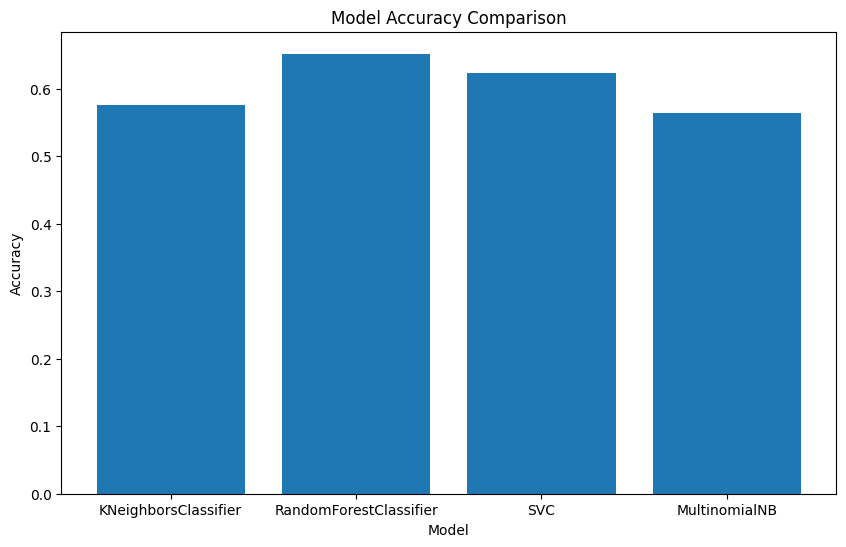

In [44]:
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

## Load the model

In [104]:
import pickle
pickle.dump(tfidf,open(os.path.join(project_root, os.path.join('models', f'tfidf_vectorizer.pkl')), 'wb'))

with open(r"E:\job-tasks\resume_categorization\models\RandomForestClassifier_best_model.pkl", 'rb') as f:
    loaded_model = pickle.load(f)

y_pred_loaded = loaded_model.predict(valid_vectors)


In [97]:
print(accuracy_score(y_val, y_pred_loaded))

0.6516587677725119


In [103]:
enc.classes_

array(['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS',
       'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT',
       'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DESIGNER', 'DIGITAL-MEDIA',
       'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR',
       'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER'],
      dtype=object)

In [98]:
from sklearn.metrics import classification_report

classification_rep = classification_report(y_true=y_val, y_pred=y_pred_loaded, target_names=enc.classes_, output_dict=False)
print("Classification Report:")
print(classification_rep)

Classification Report:
                        precision    recall  f1-score   support

            ACCOUNTANT       0.70      0.95      0.81        20
              ADVOCATE       0.75      0.60      0.67        20
           AGRICULTURE       1.00      0.09      0.17        11
               APPAREL       0.43      0.19      0.26        16
                  ARTS       0.75      0.17      0.27        18
            AUTOMOBILE       1.00      0.17      0.29         6
              AVIATION       0.76      0.80      0.78        20
               BANKING       0.70      0.74      0.72        19
                   BPO       0.00      0.00      0.00         4
  BUSINESS-DEVELOPMENT       0.38      0.40      0.39        20
                  CHEF       0.81      0.85      0.83        20
          CONSTRUCTION       0.94      0.84      0.89        19
            CONSULTANT       0.56      0.25      0.34        20
              DESIGNER       0.69      0.61      0.65        18
         DIGITAL

c:\Users\Sadhin\.conda\envs\ba-task\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sadhin\.conda\envs\ba-task\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sadhin\.conda\envs\ba-task\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [99]:
# Extract pfd files
!pip install PyPDF2 -q

In [102]:
from PyPDF2 import PdfReader

def extract_text_from_pdf(file_path):
    reader = PdfReader(file_path)
    text = "".join(page.extract_text() for page in reader.pages)
    return text

In [ ]:
from nltk import sent_tokenize, word_tokenize, pos_tag
def preprocess_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub(r'[^\w\s]|_', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r'http\S+\s', "", text)
    text = re.sub(r'https?://\S+|www\.\S+', "", text)
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', "", text)

    sentences = sent_tokenize(text)
    features = ""

    stop_words = set(nltk.corpus.stopwords.words("english"))
    for sent in sentences:
        if any(criteria in sent for criteria in ['skills', 'education', 'experience', 'summary']):
            words = word_tokenize(sent)
            words = [word for word in words if word not in stop_words]
            tagged_words = pos_tag(words)
            filtered_words = [word for word, tag in tagged_words if tag not in ['DT', 'IN', 'TO', 'PRP', 'WP']]
            features += " ".join(filtered_words)
    return features

In [ ]:
import os
import pandas as pd
import pickle

# Load the trained model
with open('models/best_model.pkl', 'rb') as f:
    model = pickle.load(f)

def categorize_resumes(resume_dir):
    # Create a dictionary to store the categorized resumes
    categorized_resumes = {}

    # Iterate through the resumes in the directory
    for filename in os.listdir(resume_dir):
        # Check if the file is a resume (assuming .pdf or .docx extension)
        if filename.endswith(('.pdf')):
            # Extract the text from the resume
            resume_text = preprocess_text(extract_text_from_pdf(filename))

            # Preprocess the text using TF-IDF vectorization
            with open(r"E:\job-tasks\resume_categorization\models\tfidf_vectorizer.pkl", 'rb') as f:
                vectorizer = pickle.load(f)
            resume_vector = vectorizer.fit_transform([resume_text])

            # Use the trained model to predict the category
            with open(r"E:\job-tasks\resume_categorization\models\RandomForestClassifier_best_model.pkl", 'rb') as f:
                loaded_model = pickle.load(f)
            predicted_category = loaded_model.predict(resume_vector)

            # Store the categorized resume in the dictionary
            categorized_resumes[filename] = predicted_category[0]

    # Create the categorized_resumes.csv file
    df = pd.DataFrame(list(categorized_resumes.items()), columns=['filename', 'category'])
    df.to_csv('categorized_resumes.csv', index=False)

    # Move the resumes to their respective category folders
    output_directory = 'categorized_resumes'
    for filename, category in categorized_resumes.items():
        category_dir = os.path.join(resume_dir, category)
        if not os.path.exists(category_dir):
            os.makedirs(category_dir)
        os.rename(os.path.join(resume_dir, filename), os.path.join(category_dir, filename))

if __name__ == '__main__':
    if len(sys.argv) != 2:
        print("Usage: python script.py path/to/dir")
        sys.exit(1)

    input_directory = sys.argv[1]
    categorize_resumes(input_directory)